In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calculate
import data
import lmfit
import models

pd.set_option("display.precision", 5)
pd.set_option('display.width', 200)

In [4]:
input_data = data.load_data("JZ/data/aktivni_pokus.csv")

print(input_data)

Loading data from JZ/data/aktivni_pokus.csv
    compound         c    log c  n_reps   rep1   rep2   rep3   rep4   rep5   rep6   rep7   rep8  median        SD      SEM
0      TD139  400.0000  2.60206       6    NaN    NaN   32.0   29.0   33.0   31.0   27.0   30.0    30.5   2.16025  0.88192
1      TD139   40.0000  1.60206       6    NaN    NaN   23.0   26.0   27.0   25.0   26.0   30.0    26.0   2.31661  0.94575
2      TD139    4.0000  0.60206       8   27.0   26.0   24.0   27.0   28.0   32.0   28.0   25.0    27.0   2.41646  0.85435
3      TD139    2.0000  0.30103       2   26.0   27.0    NaN    NaN    NaN    NaN    NaN    NaN    26.5   0.70711  0.50000
4      TD139    1.0000  0.00000       2   25.0   24.0    NaN    NaN    NaN    NaN    NaN    NaN    24.5   0.70711  0.50000
5      TD139    0.5000 -0.30103       2   27.0   25.0    NaN    NaN    NaN    NaN    NaN    NaN    26.0   1.41421  1.00000
6      TD139    0.4000 -0.39794       6    NaN    NaN   25.0   29.0   29.0   29.0   26.0   29.0

In [5]:
compounds = input_data["compound"].unique()
print("Detected compounds:", compounds)
print("No of compounds:", len(compounds))

Detected compounds: ['TD139' 'JZ7-47-4' 'JZ7-50-2']
No of compounds: 3


In [6]:
RT = 0.03           # [R]T parameter
LsT = 0.005           # [L]*T parameter
Kds = 0.02164        # Kd of the probe

In [7]:
Kd_results = calculate.fit_Kd(input_data, model="comp_3st_specific", RT=RT, LsT=LsT, Kds=Kds, ci=True, fix_min=27, fix_max=False)
Kd_results = Kd_results.sort_values(by=['Kd'], ascending=False)
print(Kd_results)
Kd_results.to_clipboard(excel=True, sep=",")

Fitting comp_3st_specific ...
   compound  n_points       Kd     loCL     upCL       SE              model  min        max    RT    LsT      Kds       Chi^2      R^2
1  JZ7-47-4        70  0.01700  0.01316  0.02189  0.00233  comp_3st_specific   27  172.12952  0.03  0.005  0.02164  2442.67878  0.97116
2  JZ7-50-2        58  0.00927  0.00790  0.01084  0.00075  comp_3st_specific   27  171.08798  0.03  0.005  0.02164   627.58237  0.99070
0     TD139        66  0.00222  0.00182  0.00267  0.00021  comp_3st_specific   27  165.72488  0.03  0.005  0.02164   696.20233  0.98970


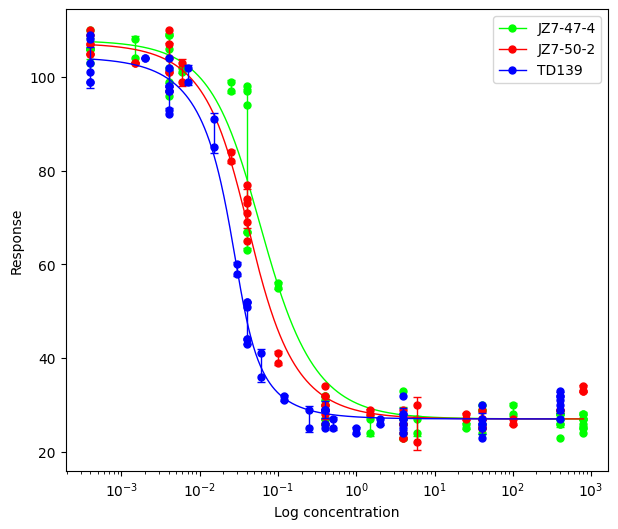

In [8]:
plt.figure(figsize=(7, 6))

data.plot(input_data, Kd_results, compound_sel=False, show_all_data=True, show_medians=False)

plt.xlabel("Log concentration")
plt.ylabel("Response")
plt.xscale("log")
plt.legend()
#plt.savefig("actives_alldata.png", dpi=150)
plt.show()

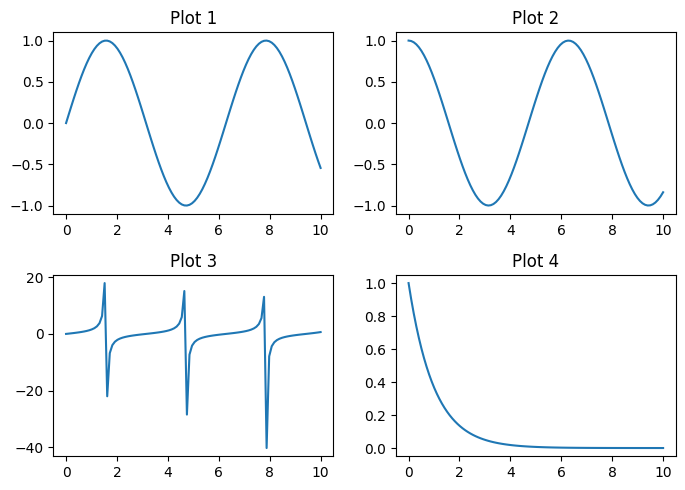

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
x = np.linspace(0, 10, 100)
y_list = [np.sin(x), np.cos(x), np.tan(x), np.exp(-x)]  # list of functions

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 5))  # 2 rows, 2 columns

# Flatten the 2D axes array to iterate over it
axes = axes.flatten()

# Plot each function on a different subplot
for i, y in enumerate(y_list):
    axes[i].plot(x, y)
    axes[i].set_title(f"Plot {i+1}")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [10]:
print(compounds)

['TD139' 'JZ7-47-4' 'JZ7-50-2']


AttributeError: 'Axes' object has no attribute 'data'

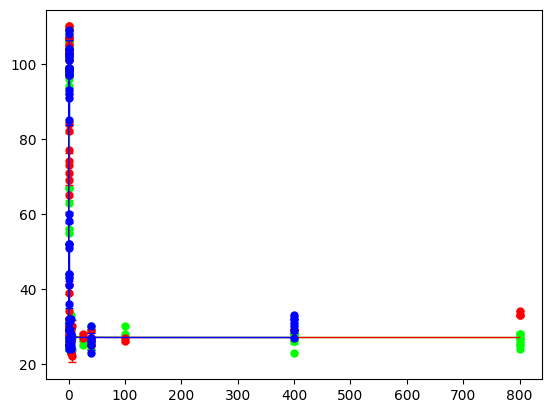

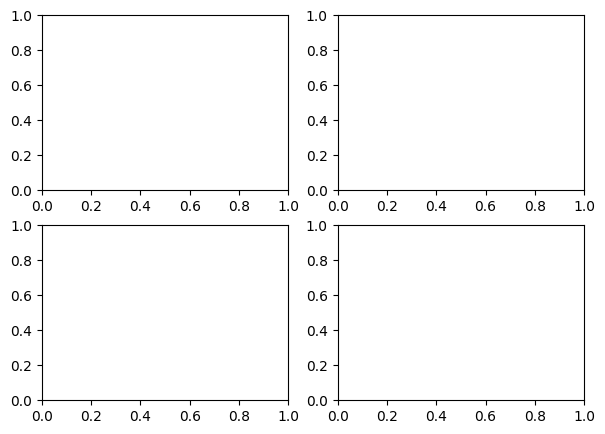

In [12]:
data.plot(input_data, Kd_results, compound_sel=False, show_all_data=True, show_medians=False)


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 5))  # 2 rows, 2 columns

# Flatten the 2D axes array to iterate over it
axes = axes.flatten()

# Plot each function on a different subplot
for i, compound in enumerate(compounds):
    axes[i].plot
    axes[i].set_title(f"Plot {i+1}")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()